## Model of Lupus Nephritis
#### see paper: [here](https://tbiomed.biomedcentral.com/articles/10.1186/1742-4682-7-14)

In [1]:
import numpy as np
import random
from scipy.integrate import odeint

In [2]:

# Define Variables and parameters
Lupusvars = list(var("I", "P", "D", "A"))
sa = 0.05
si = 0.001 #rate that immune complexes deposit in the kidneys
sid = 0.002 #immune response to accumulation of damaged cells
kip = 1 # rate of immune complex removal from system
kpp = 0.02 
kpi = 0.13 #rate of mediator activation and recruitment
kpd = 0.001 #rate of activation for pro-inflammatory agents as a result of cytokine release or induced by damaged tissue
kdip = 0.025
kdp = 0.27
kap = 0.022 #level of inflammation???
kad = 0.22 #level of damage???
mup = 0.06 #decay of pro-inflammatory mediators
mua = 2.2 #rate of anti-inflammatory agent degradation
mud = 0.04 #decay rate of damage
kid = 1
Ainf = 0.45

(xmin, xmax, ymin, ymax) = (0, 1, 0, 3)



tmax=60*10
t_range = srange(0, tmax, 1)
init = (0.1, 0.4, 1.7, 0.1)
changeday = 180

def fsid_t(t): #time dependency Sid
    sid = 0.002
    if 0 <= t%changeday <= .08: #gives the higher value for ~two weeks of time based on data
        sid = sid*3
    else:
        sid = 0.002
    return sid 

def fsi_t(t): #time dependcy Si
    si = 0.001
    if 0 <= t%changeday <= .08: #gives higher value for ~2 weeks of time
        si = si*5
    else:
        si = 0.001
    return si

def systems (IPDA, t, sa_t, si_t,sid_t, kip_t, kpp_t, kpi_t, kpd_t, kdip_t,kdp_t, kap_t,kad_t,mup_t,mua_t,mud_t,kid_t, Ainf_t ):
    I, P, D, A = IPDA 
    def f(x):
        return x/((1+A/Ainf)^2) 

    Idot = f(si_t(t)) + f(sid_t(t))*(D^2/(kid_t^2 + D^2)) - kip_t*f(P)*I
    Pdot = f(kpi_t*I + kpp_t*P) + f(kpd_t*D) - mup_t*P
    Ddot = kdip_t*f(P)*I + kdp_t*f(P) - mud_t*D
    Adot = sa_t + f(kap_t*P + kad_t*D) - mua_t*A

    LupusSystem = (Idot, Pdot, Ddot, Adot)
    return LupusSystem



IPDAsim = odeint(systems, init, t_range, args=(sa, fsi_t, fsid_t, kip, kpp, kpi, kpd, kdip,kdp, kap,kad,mup,mua,mud,kid, Ainf))


#LupusSim = odeint(systems, init, t_range, Lupusvars)
#LupusSim = np.insert(LupusSim, 0, t_range, axis=1)
#Its = list_plot(LupusSim[::,(0,1)], plotjoined=True, color="grey", legend_label="I")
#Pts = list_plot(LupusSim[::,(0,2)], plotjoined=True, color="blue", legend_label="P")
#Dts = list_plot(LupusSim[::,(0,3)], plotjoined=True, color="red", legend_label="D")
#Ats = list_plot(LupusSim[::,(0,4)], plotjoined=True, color="black", legend_label="A")
#show(Its+Pts+Dts+Ats, title = "Lupus", ymax = ymax)

In [3]:
def plot_ts4(SIRsim, times=t_range):
    totpop = np.sum(SIRsim,axis=1).tolist() # this is a bug
    SIRsim = np.insert(SIRsim, 0, totpop, axis=1)
    SIRsim = np.insert(SIRsim, 0, times, axis=1)
    Its = list_plot(SIRsim[::,(0,1)], plotjoined=True, color="grey", legend_label="I")
    Pts = list_plot(SIRsim[::,(0,2)], plotjoined=True, color="blue", legend_label="P")
    Dts = list_plot(SIRsim[::,(0,3)], plotjoined=True, color="red", legend_label="D")
    Ats = list_plot(SIRsim[::,(0,4)], plotjoined=True, color="purple", legend_label="A")
    return Its+Pts+Dts+Ats

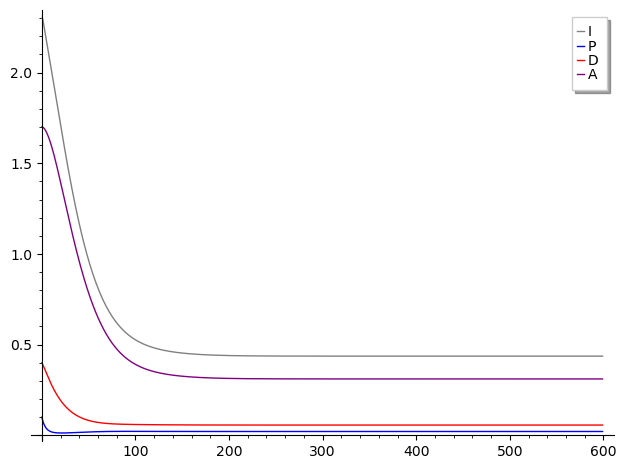

In [4]:
show(plot_ts4(IPDAsim))